In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Auto.csv")
df = df[["mpg","horsepower"]]
for i in range(len(df["horsepower"].values)):
    if df["horsepower"][i].isnumeric() == False:
        df["horsepower"][i] = np.nan
df.dropna(inplace = True)
df["horsepower"] = pd.to_numeric(df["horsepower"])


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [3]:
model = smf.ols(formula = "mpg ~ horsepower", data = df)
result = model.fit()

In [4]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           7.03e-81
Time:                        17:02:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

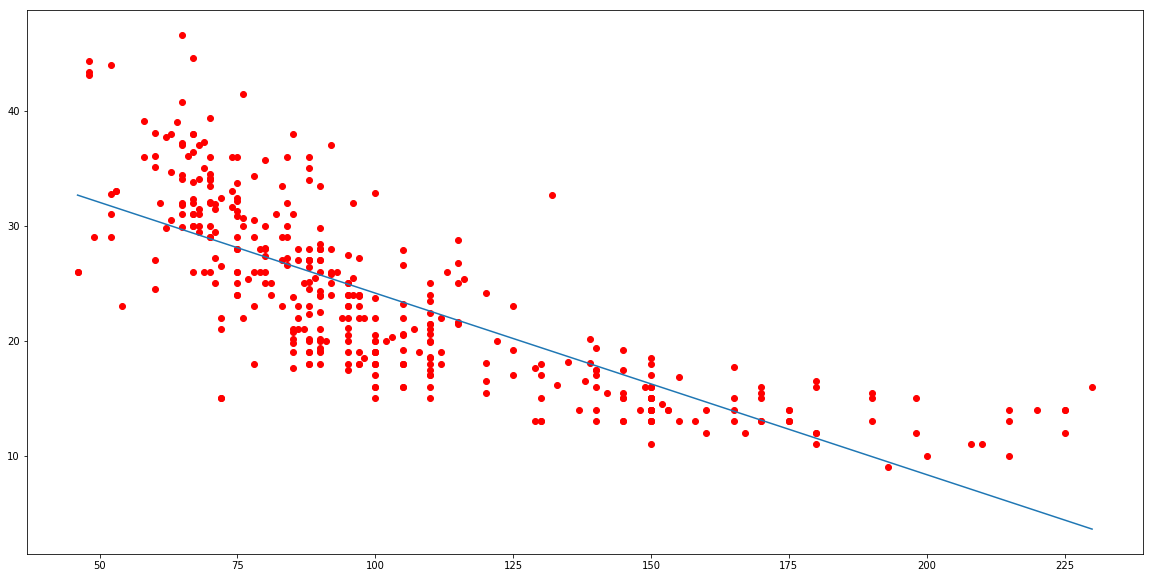

0     32.675003
1     32.082280
2     31.489557
3     30.896834
4     30.304111
5     29.711388
6     29.118665
7     28.525942
8     27.933219
9     27.340496
10    26.747772
11    26.155049
12    25.562326
13    24.969603
14    24.376880
15    23.784157
16    23.191434
17    22.598711
18    22.005988
19    21.413265
20    20.820542
21    20.227819
22    19.635096
23    19.042372
24    18.449649
25    17.856926
26    17.264203
27    16.671480
28    16.078757
29    15.486034
30    14.893311
31    14.300588
32    13.707865
33    13.115142
34    12.522419
35    11.929695
36    11.336972
37    10.744249
38    10.151526
39     9.558803
40     8.966080
41     8.373357
42     7.780634
43     7.187911
44     6.595188
45     6.002465
46     5.409742
47     4.817019
48     4.224295
49     3.631572
dtype: float64

In [5]:
fig1 = plt.figure(figsize = (20,10))
axes = fig1.add_subplot(111)

axes.scatter(df["horsepower"],df["mpg"], c = "red", marker = "o")
x = np.linspace(df["horsepower"].values.min(),df["horsepower"].values.max(),50)
y = result.predict(exog=dict(horsepower=x))
axes.plot(x,y)
plt.show()